In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import subprocess
import bz2
plt.rc('font', size=22)

# data files
path = './data/hiion/'
files = os.listdir(path)
files = [f for f in files if 'monitor' in f]

# getrunNumber from string e.g., int('/data/hiion/scout_326676_000000.monitor.txt'.split('_')[1]
getRun = lambda x: int(x.split('_')[1])

# exclude runs
underflowRuns = [326676, 326883, 327401]
overflowRuns  = [326434, 326897]
files = [f for f in files if getRun(f) not in underflowRuns]

# list to hold dataframes
dfs = []

for file in files[0:2]:
    filepath = path+file
    df = pd.read_csv(filepath)
    
    # integrity checks
    if df.columns[0] != '0':print(f'underflow was found in {filepath}') 
    if df.iloc[3564].to_numpy()[0] != 0: print(f'overflow was found in {filepath}')    
    
    # drop overflow row
    df = df[:-1]
    
    # reindex such that index = bx
    df.index = pd.RangeIndex(start=1, stop=3565, step=1)
    
    # add a column with the run number
    df['run'] = getRun(file) 
    dfs += [df]
    
plt.rc('figure', max_open_warning = 100)

goodBX  = lambda bx: True if bx >= 3445 and  bx <= 3555 else False
bxMin = 3445-3564
bxMax = 3555-3564

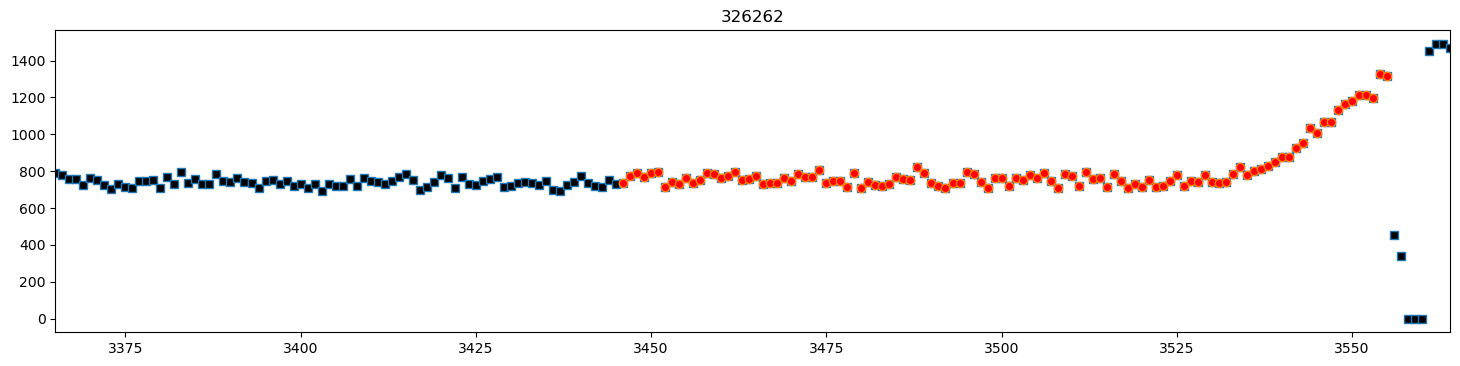

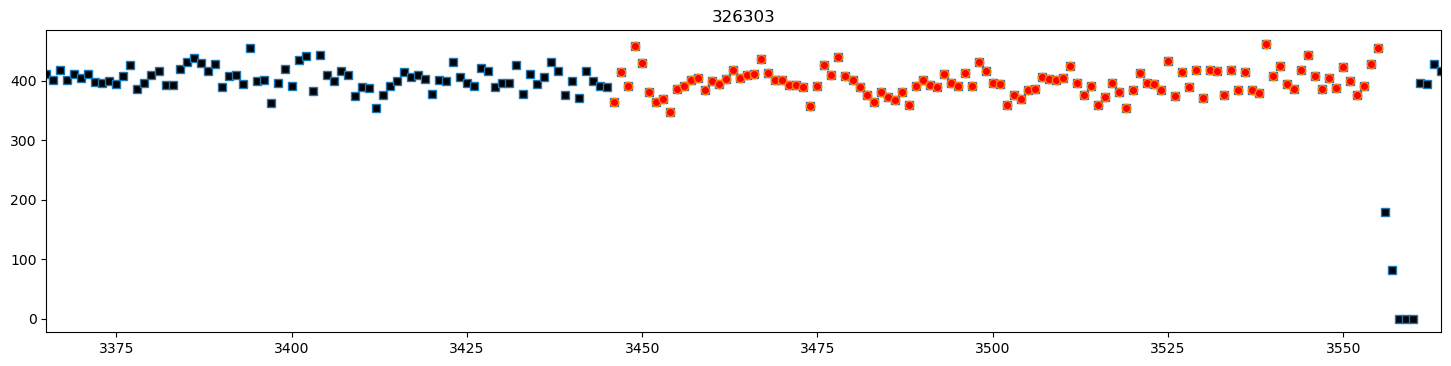

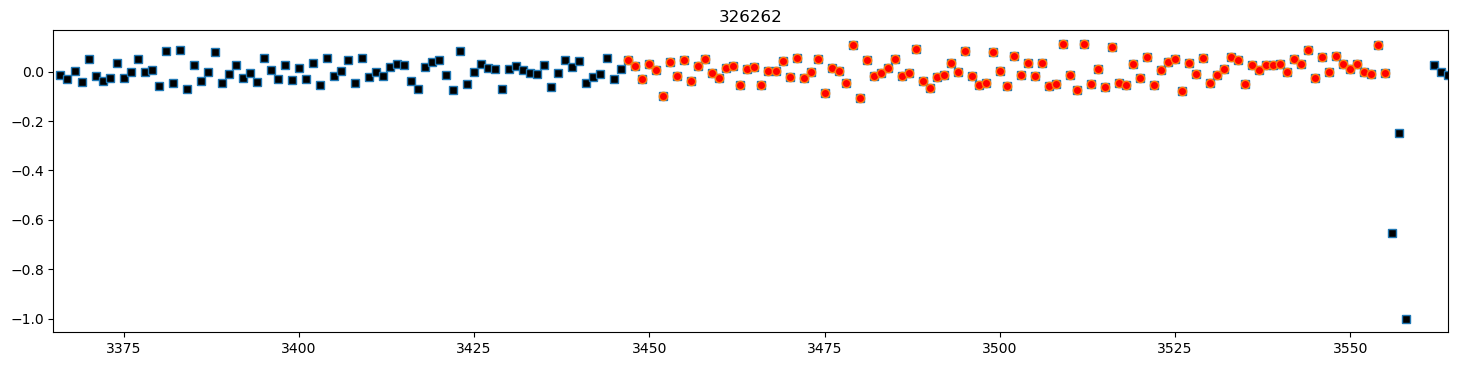

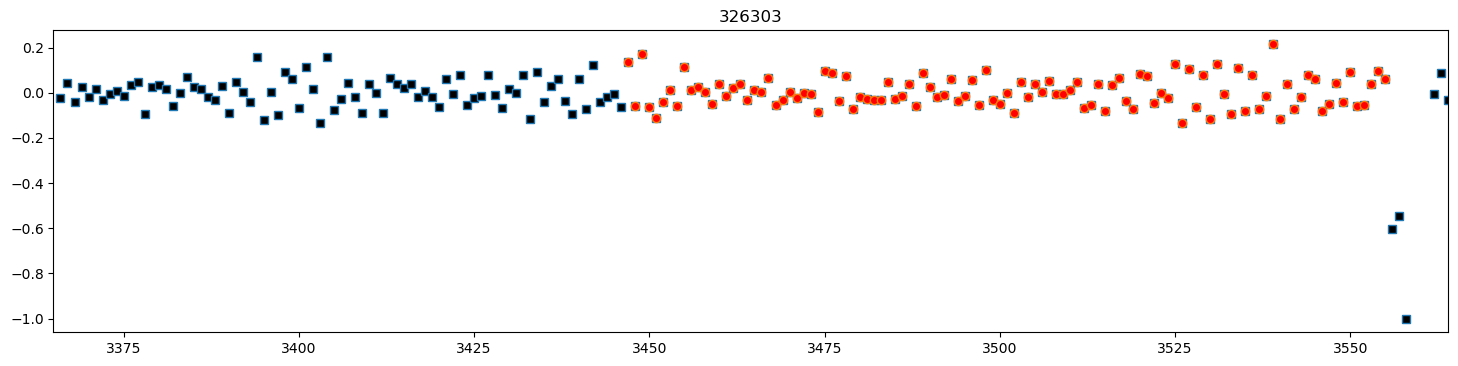

In [10]:
for df in dfs[0:2]:
    plt.figure(figsize=(18,4), dpi=100)
    run = df.iloc[0,1]
    df[-200:]['0'].plot(style='s', markerfacecolor='black', title = run)
    df[bxMin:bxMax]['0'].plot(style='o', markerfacecolor='red', title = run)
    
for df in dfs[0:2]:
    plt.figure(figsize=(18,4), dpi=100)
    run = df.iloc[0,1]
    df[-200:]['0'].pct_change().plot(style='s', markerfacecolor='black', title = run)
    df[bxMin:bxMax]['0'].pct_change().plot(style='o', markerfacecolor='red', title = run)

In [12]:
# read data (csv saved in txt) from url and put them in a panda's dataframe
url = 'https://theofil.web.cern.ch/theofil/dataScout/scout_326790_000000_trunc.txt'
df = pd.read_csv(url)
df.head()

,orbit,bx,phi,eta,pt,charge
0,2700706,3519,-2.29074,0.391500,21.5,1
1,2705517,3547,-1.13446,-0.641625,3.5,-1
2,2706975,3468,1.37445,-0.685125,34.5,1
3,2707595,3488,1.54898,0.000000,81.0,-1
4,2709264,3551,1.67988,-0.358875,5.0,1


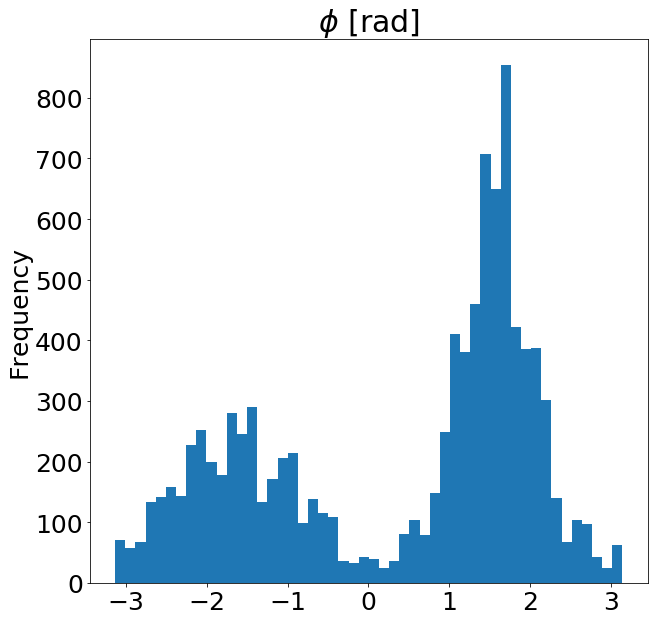

In [21]:
plt.figure(figsize=(10,10))
plt.rc('font', size=25)
df['phi'].plot.hist(bins = 50, title = '$\phi$ [rad]')